<a href="https://colab.research.google.com/github/anikaemo/1streposi/blob/main/Copy_of_CardioVascularDiseaseF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [10]:
!pip install imbalanced-learn

In [11]:
pip install tensorflow

In [12]:
pip install scikeras

In [13]:
pip install xgboost

In [14]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier



In [15]:
from google.colab import drive
drive.mount('/content/drive') # Corrected mountpoint to a directory
import os

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/data_cardiovascular_risk.csv')
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [17]:
df = df.drop(['id'], axis=1)
df.head(5)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [18]:
df.tail(5)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0

EDA

In [19]:
print(df.dtypes.value_counts())

float64    9
int64      5
object     2
Name: count, dtype: int64


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [22]:
df.value_counts('TenYearCHD')

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

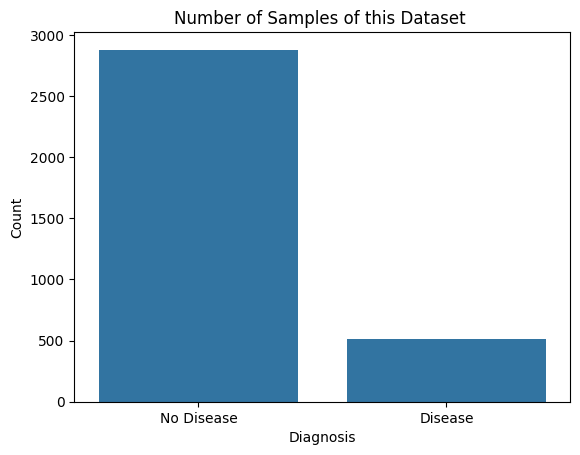

In [23]:

import seaborn as sns
sns.countplot(x='TenYearCHD', data=df)
plt.title('Number of Samples of this Dataset ')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.savefig('Number_of_samples_of_this_Dataset.pdf', bbox_inches='tight')
plt.show()


In [24]:
x = df.drop(columns=['TenYearCHD'],axis=1)

In [25]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df_encoded = pd.get_dummies(df,columns=['age', 'education', 'sex', 'is_smoking','cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI','heartRate','glucose','TenYearCHD'],drop_first=True
)

In [29]:
# Convert 'bool' columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())
print(df.dtypes)

   age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    0           1         3.0     0.0                0   
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3         

In [30]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    0           1         3.0     0.0                0   
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [31]:
df.tail()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
3385   60        1.0    0           0         0.0     0.0                0   
3386   46        1.0    0           0         0.0     0.0                0   
3387   44        3.0    1           1         3.0     0.0                0   
3388   60        1.0    1           0         0.0     NaN                0   
3389   54        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0

In [32]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 16


In [33]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [34]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

age
Skew : 0.23


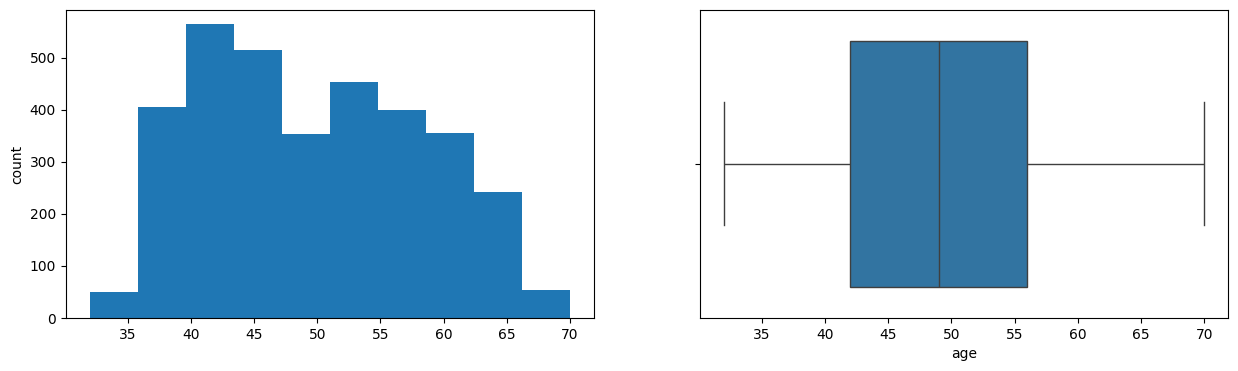

education
Skew : 0.7


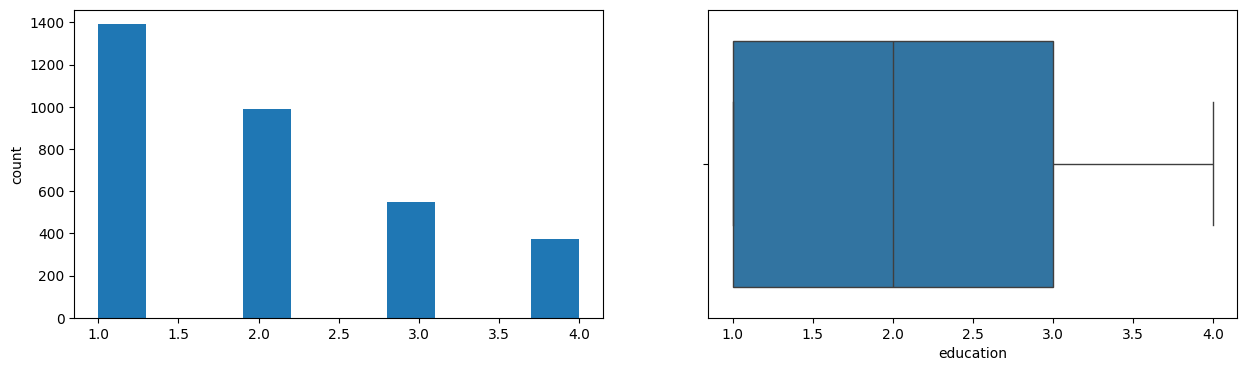

sex
Skew : 0.27


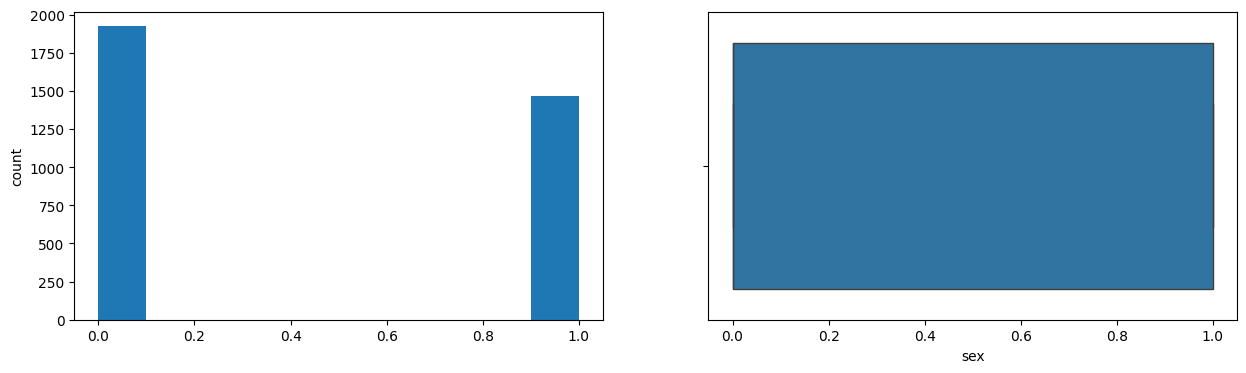

is_smoking
Skew : 0.01


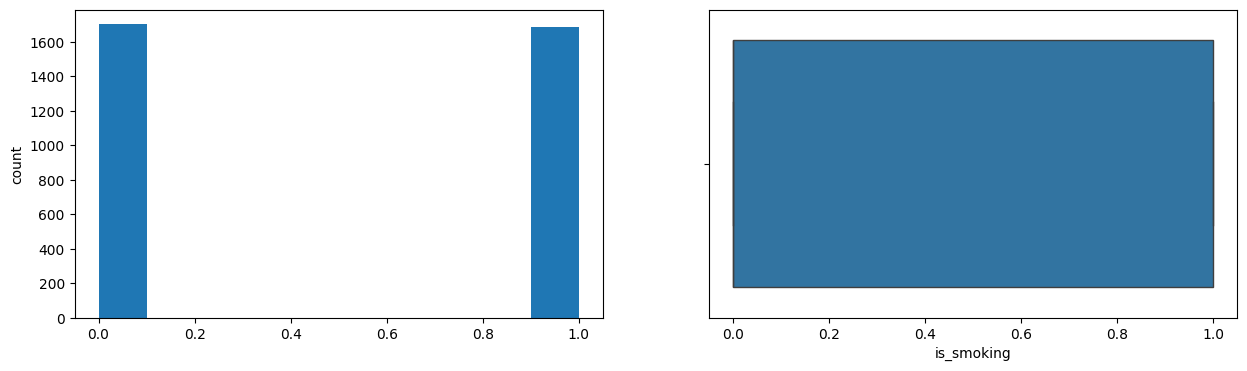

cigsPerDay
Skew : 1.22


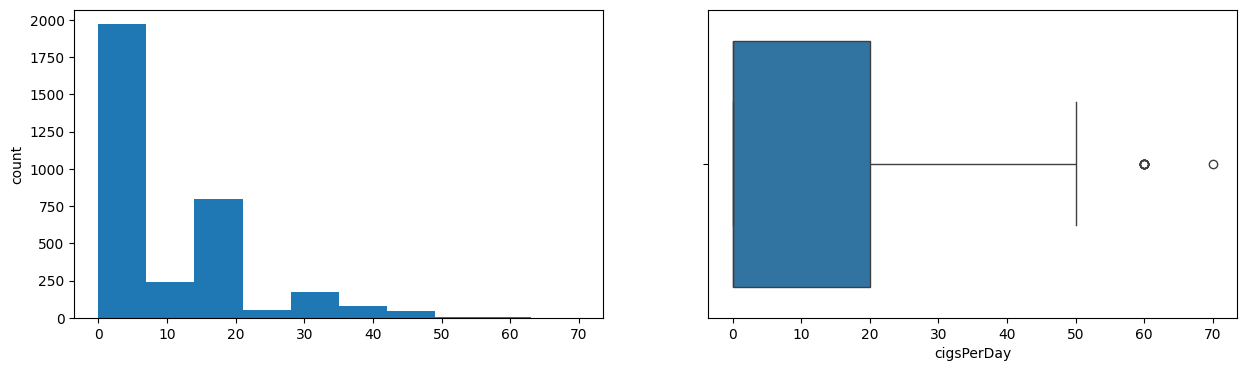

BPMeds
Skew : 5.52


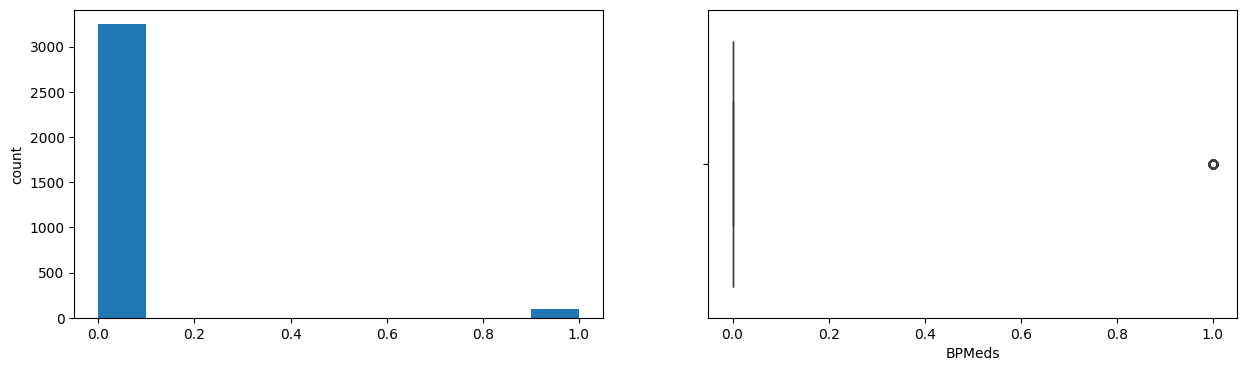

prevalentStroke
Skew : 12.3


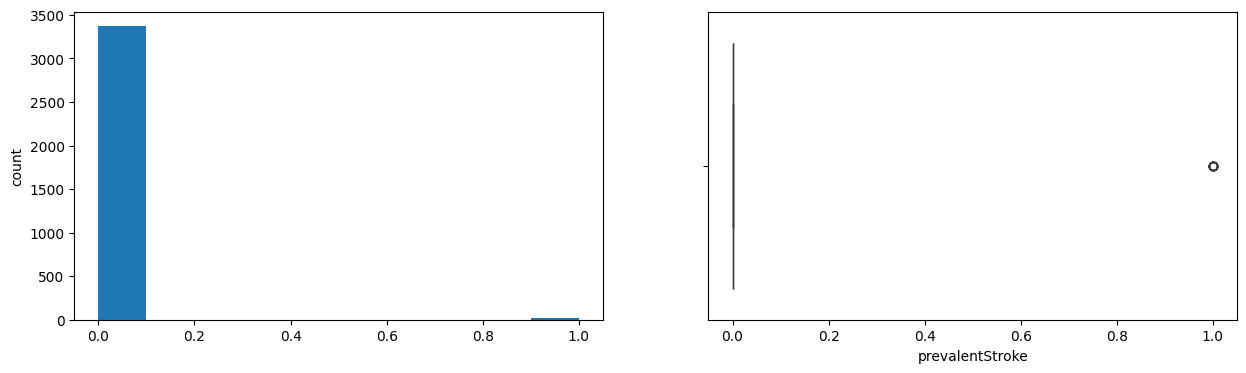

prevalentHyp
Skew : 0.8


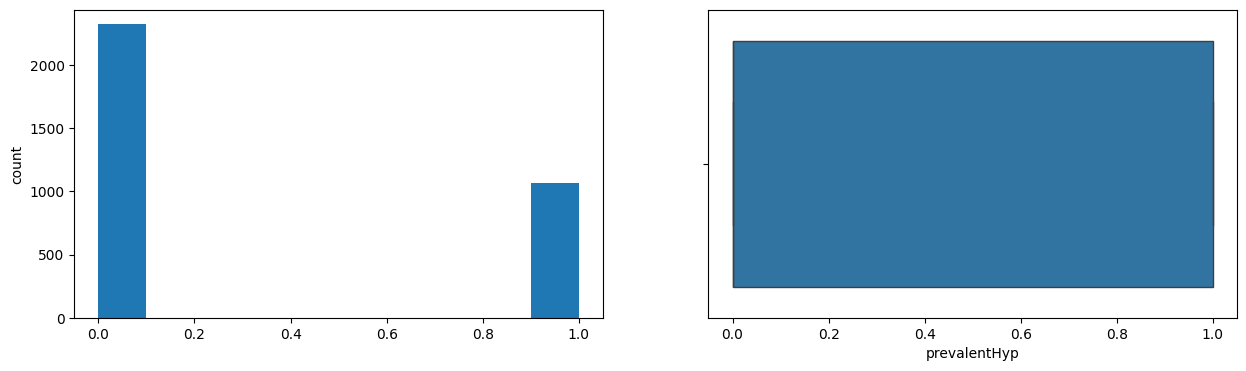

diabetes
Skew : 6.0


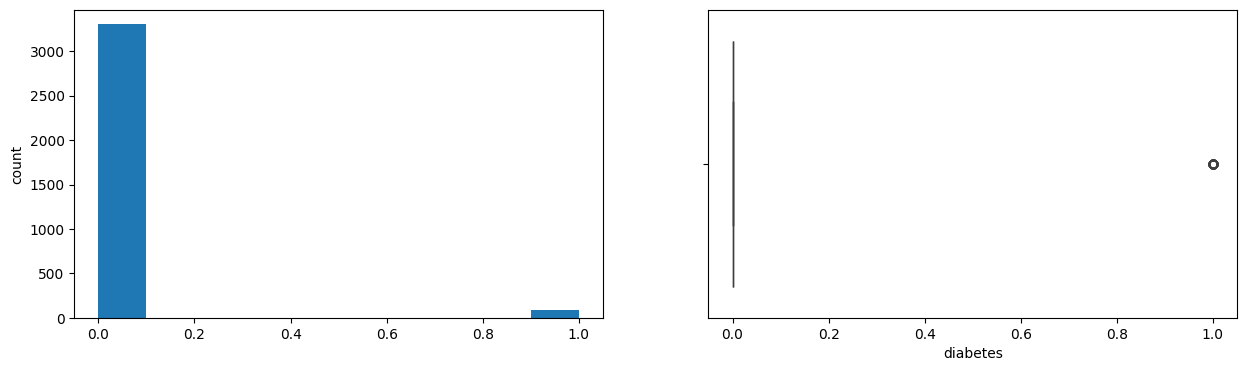

totChol
Skew : 0.94


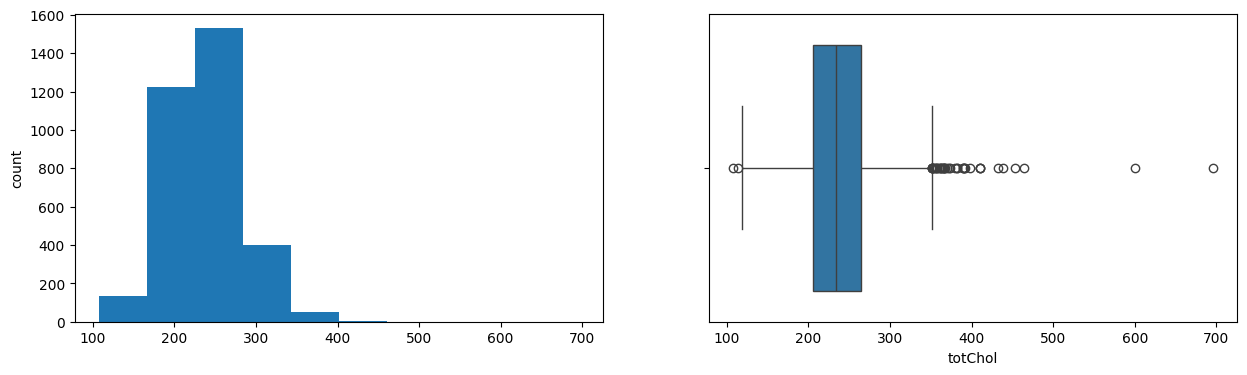

sysBP
Skew : 1.18


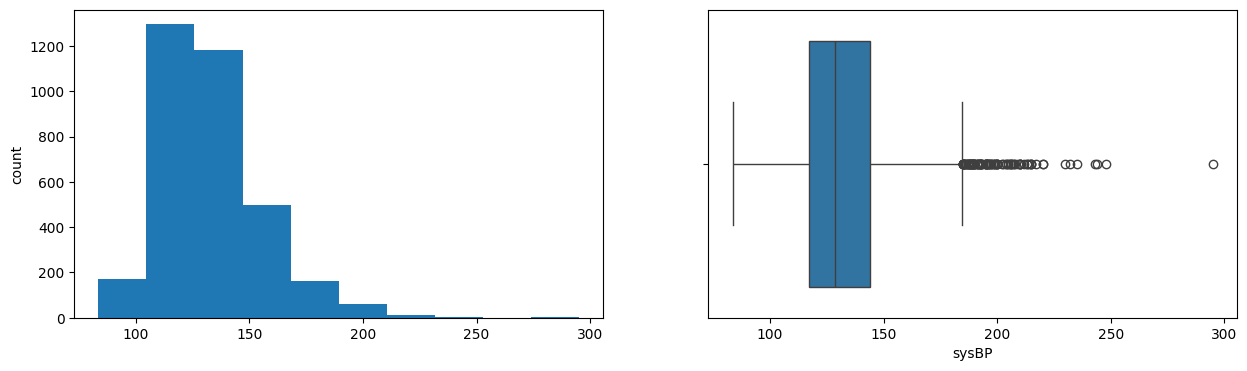

diaBP
Skew : 0.72


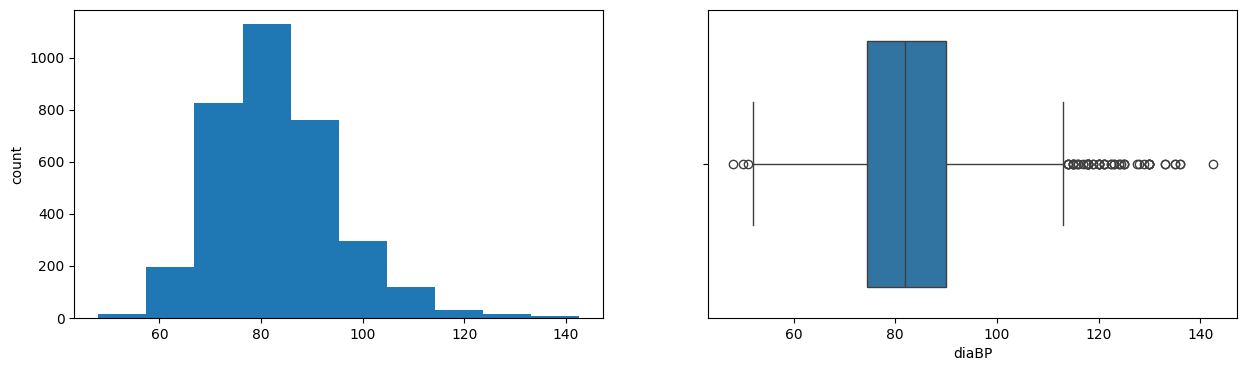

BMI
Skew : 1.02


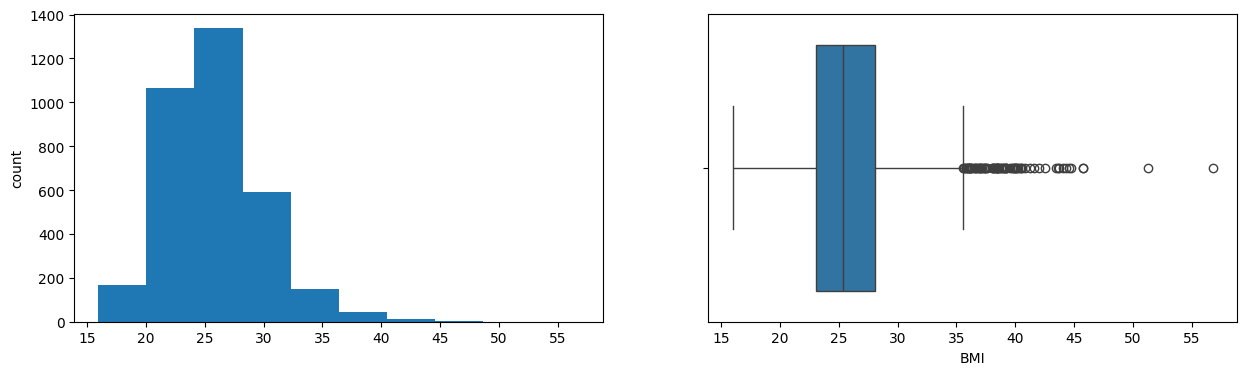

heartRate
Skew : 0.68


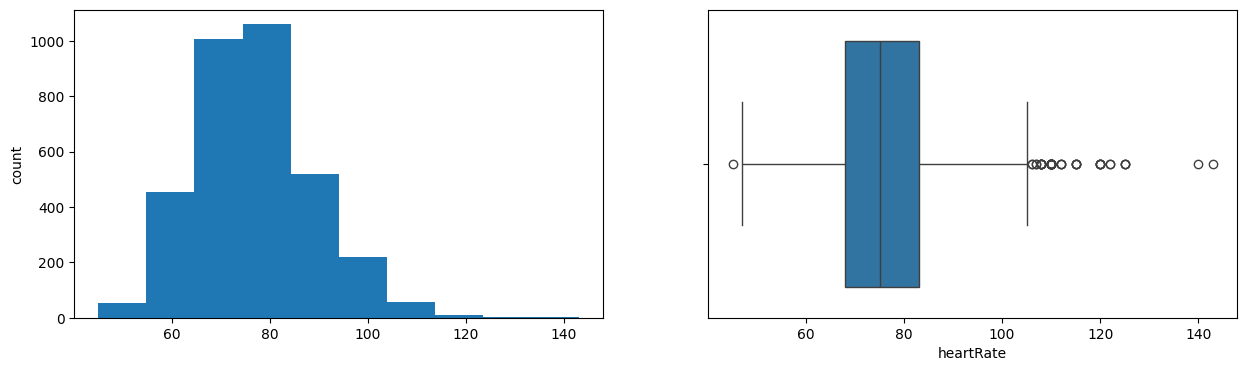

glucose
Skew : 6.14


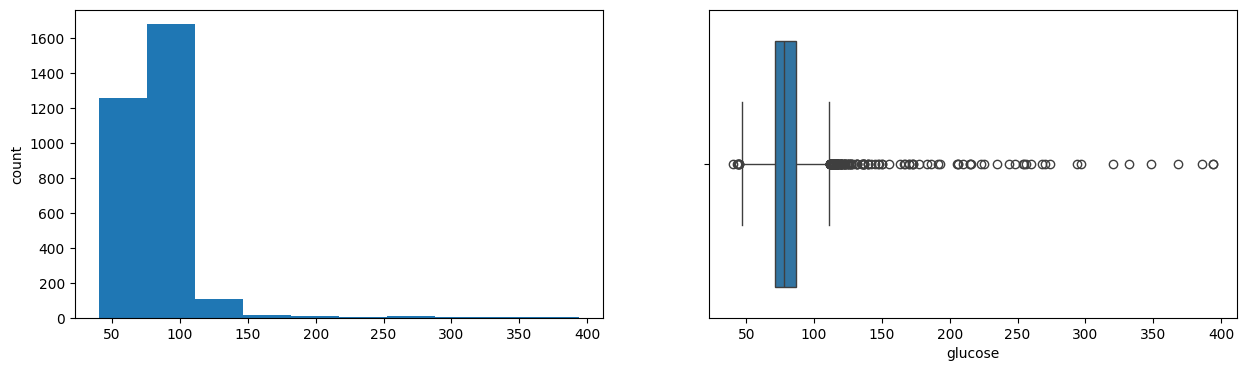

TenYearCHD
Skew : 1.95


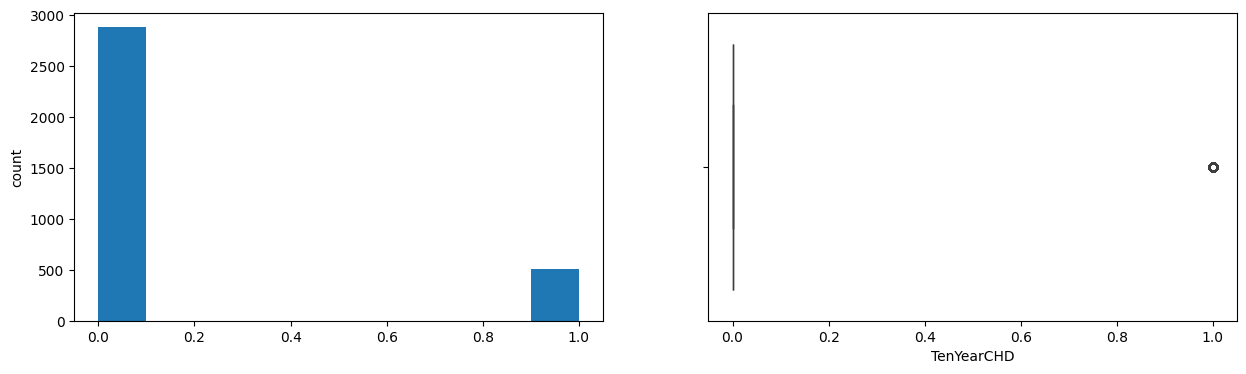

In [35]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

EDA END

Model training section

In [36]:
x = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [37]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8628318584070797
Precision: 0.7
Recall: 0.07216494845360824
F1 Score: 0.1308411214953271


Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.775811209439528
Precision: 0.2608695652173913
Recall: 0.30927835051546393
F1 Score: 0.2830188679245283


**KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)
y_pred_knn = knn_model.predict(X_test_imputed)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.8510324483775811
Precision: 0.4230769230769231
Recall: 0.1134020618556701
F1 Score: 0.17886178861788618


Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Reload original data to ensure 2D input for StandardScaler
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with imputation, scaling, and logistic regression
model = make_pipeline(
    SimpleImputer(strategy='median'), # Impute missing values
    StandardScaler(),
    LogisticRegression(max_iter=1000) # Increased max_iter
)

# Train the model
model.fit(X_train, y_train)

# Prediction
y_pred_lr = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.8539823008849557
Precision: 0.7142857142857143
Recall: 0.049019607843137254
F1 Score: 0.09174311926605505


Adaboast

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_imputed, y_train)
y_pred_ada = adaboost_model.predict(X_test_imputed)

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.8525073746312685
Precision: 1.0
Recall: 0.0196078431372549
F1 Score: 0.038461538461538464


Naive Bais

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)
y_pred_nb = nb_model.predict(X_test_imputed)

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.8348082595870207
Precision: 0.38636363636363635
Recall: 0.16666666666666666
F1 Score: 0.2328767123287671


Support Vertor Machine

In [56]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train SVC model on imputed data
svm_model = SVC(random_state=42)
svm_model.fit(X_train_imputed, y_train)
y_pred_svm = svm_model.predict(X_test_imputed)

# Scale the imputed data for LinearSVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train LinearSVC model on scaled and imputed data
svm_model_linear = LinearSVC(random_state=42, max_iter=10000) # Increased max_iter for convergence
svm_model_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_model_linear.predict(X_test_scaled)

# You can choose to evaluate either y_pred_svm or y_pred_svm_linear
# For consistency with the evaluation cell below, let's use y_pred_svm
y_pred_svm = y_pred_svm_linear

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.8510324483775811
Precision: 1.0
Recall: 0.00980392156862745
F1 Score: 0.019417475728155338


XGBoost

In [58]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.8348082595870207
Precision: 0.3611111111111111
Recall: 0.12745098039215685
F1 Score: 0.18840579710144928


ANN

In [61]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8359 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8450 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8496 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8467 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8485 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8555 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8419 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8483 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

LSTM

In [62]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8202 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8502 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

RNN

In [63]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from sklearn.model_selection import train_test_split

# Reshape input for RNN if data is 2D
if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(150, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_rnn.predict(X_test)
y_pred_rnn = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8142 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8377 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8453 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8586 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: nan - val_accuracy: 0.8496 - val_loss: nan
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for orginal (Unbalanced) Data

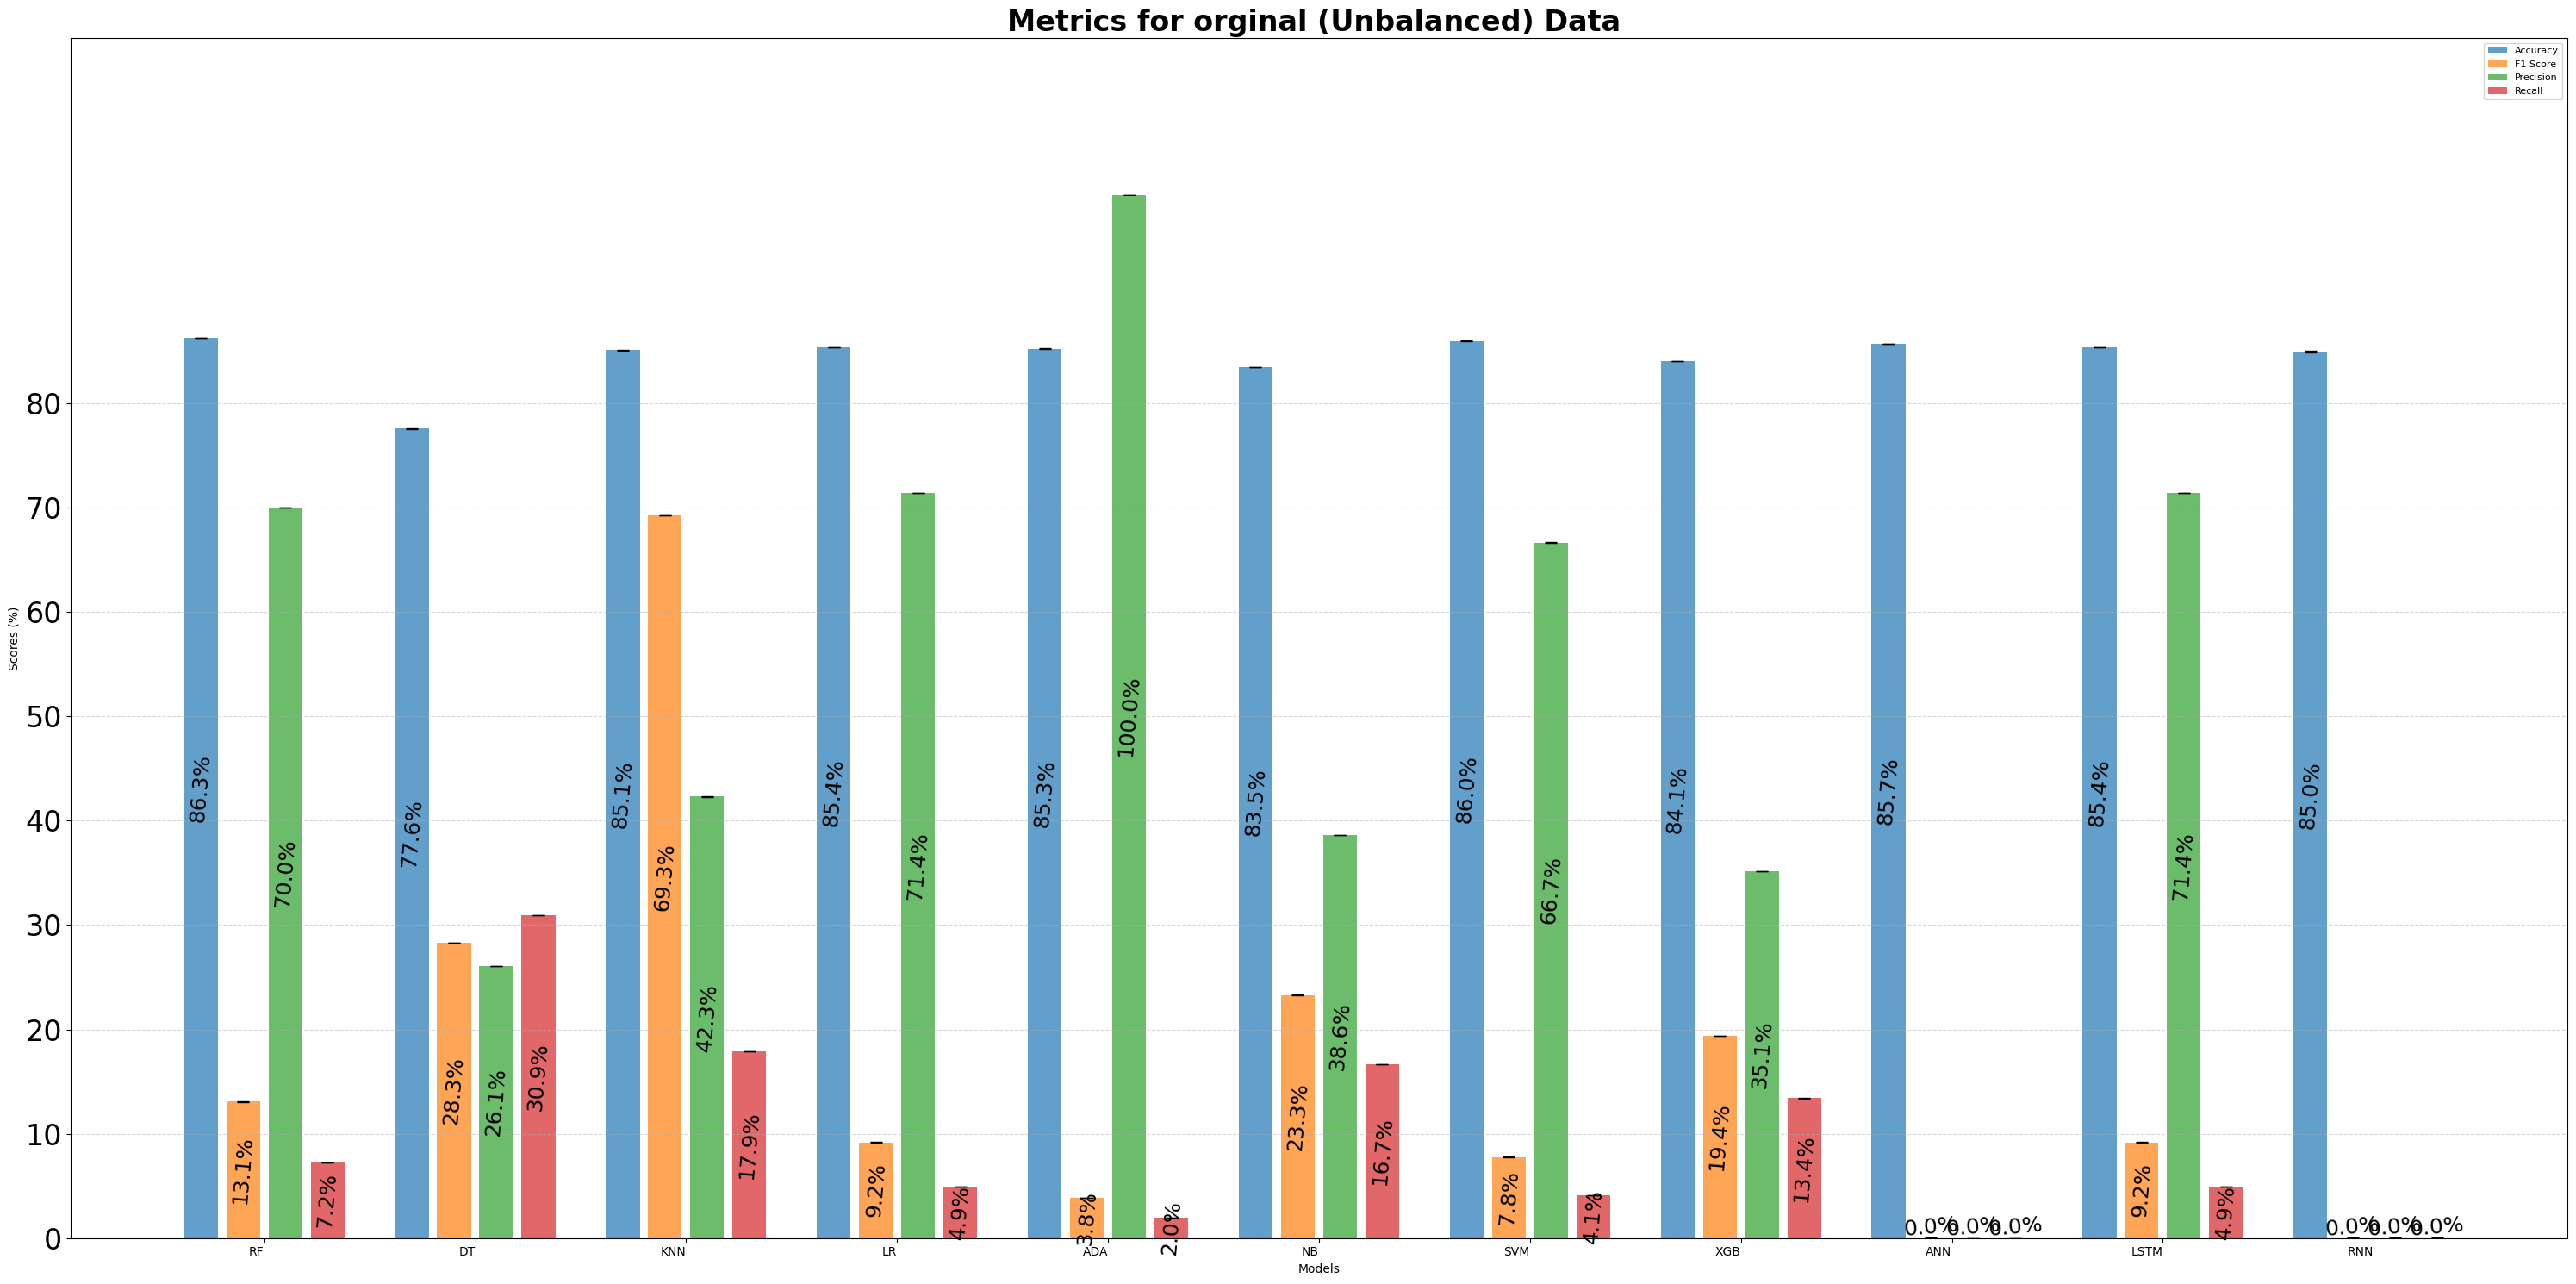

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']



# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
     0.8628318584070797, 0.775811209439528, 0.8510324483775811 ,0.8539823008849557, 0.8525073746312685,
     0.8348082595870207, 0.859882005899705,0.8407079646017699, 0.8569321533923304,0.8539823008849557,
    0.8495575221238938
]]
precision = [100 * x for x in [
     0.7, 0.2608695652173913, 0.4230769230769231, 0.7142857142857143, 1.0,
    0.38636363636363635, 0.6666666666666666, 0.35135135135135137, 0.0,0.7142857142857143,
    0.0
]]
recall = [100 * x for x in [

 0.07216494845360824, 0.30927835051546393,0.17886178861788618,0.049019607843137254 , 0.0196078431372549,0.16666666666666666,
    0.041237113402061855, 0.13402061855670103, 0.0,0.049019607843137254,0.0
]]
f1_scores_list = [100 * x for x in [
   0.1308411214953271, 0.2830188679245283 , 0.6927415763693039,0.09174311926605505, 0.038461538461538464,
     0.2328767123287671, 0.07766990291262135, 0.19402985074626866, 0.0,0.09174311926605505,
    0.0
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_scores_list, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )
        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data ', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Scores (%)', fontsize=10)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=10)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 90, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data .pdf', bbox_inches='tight')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


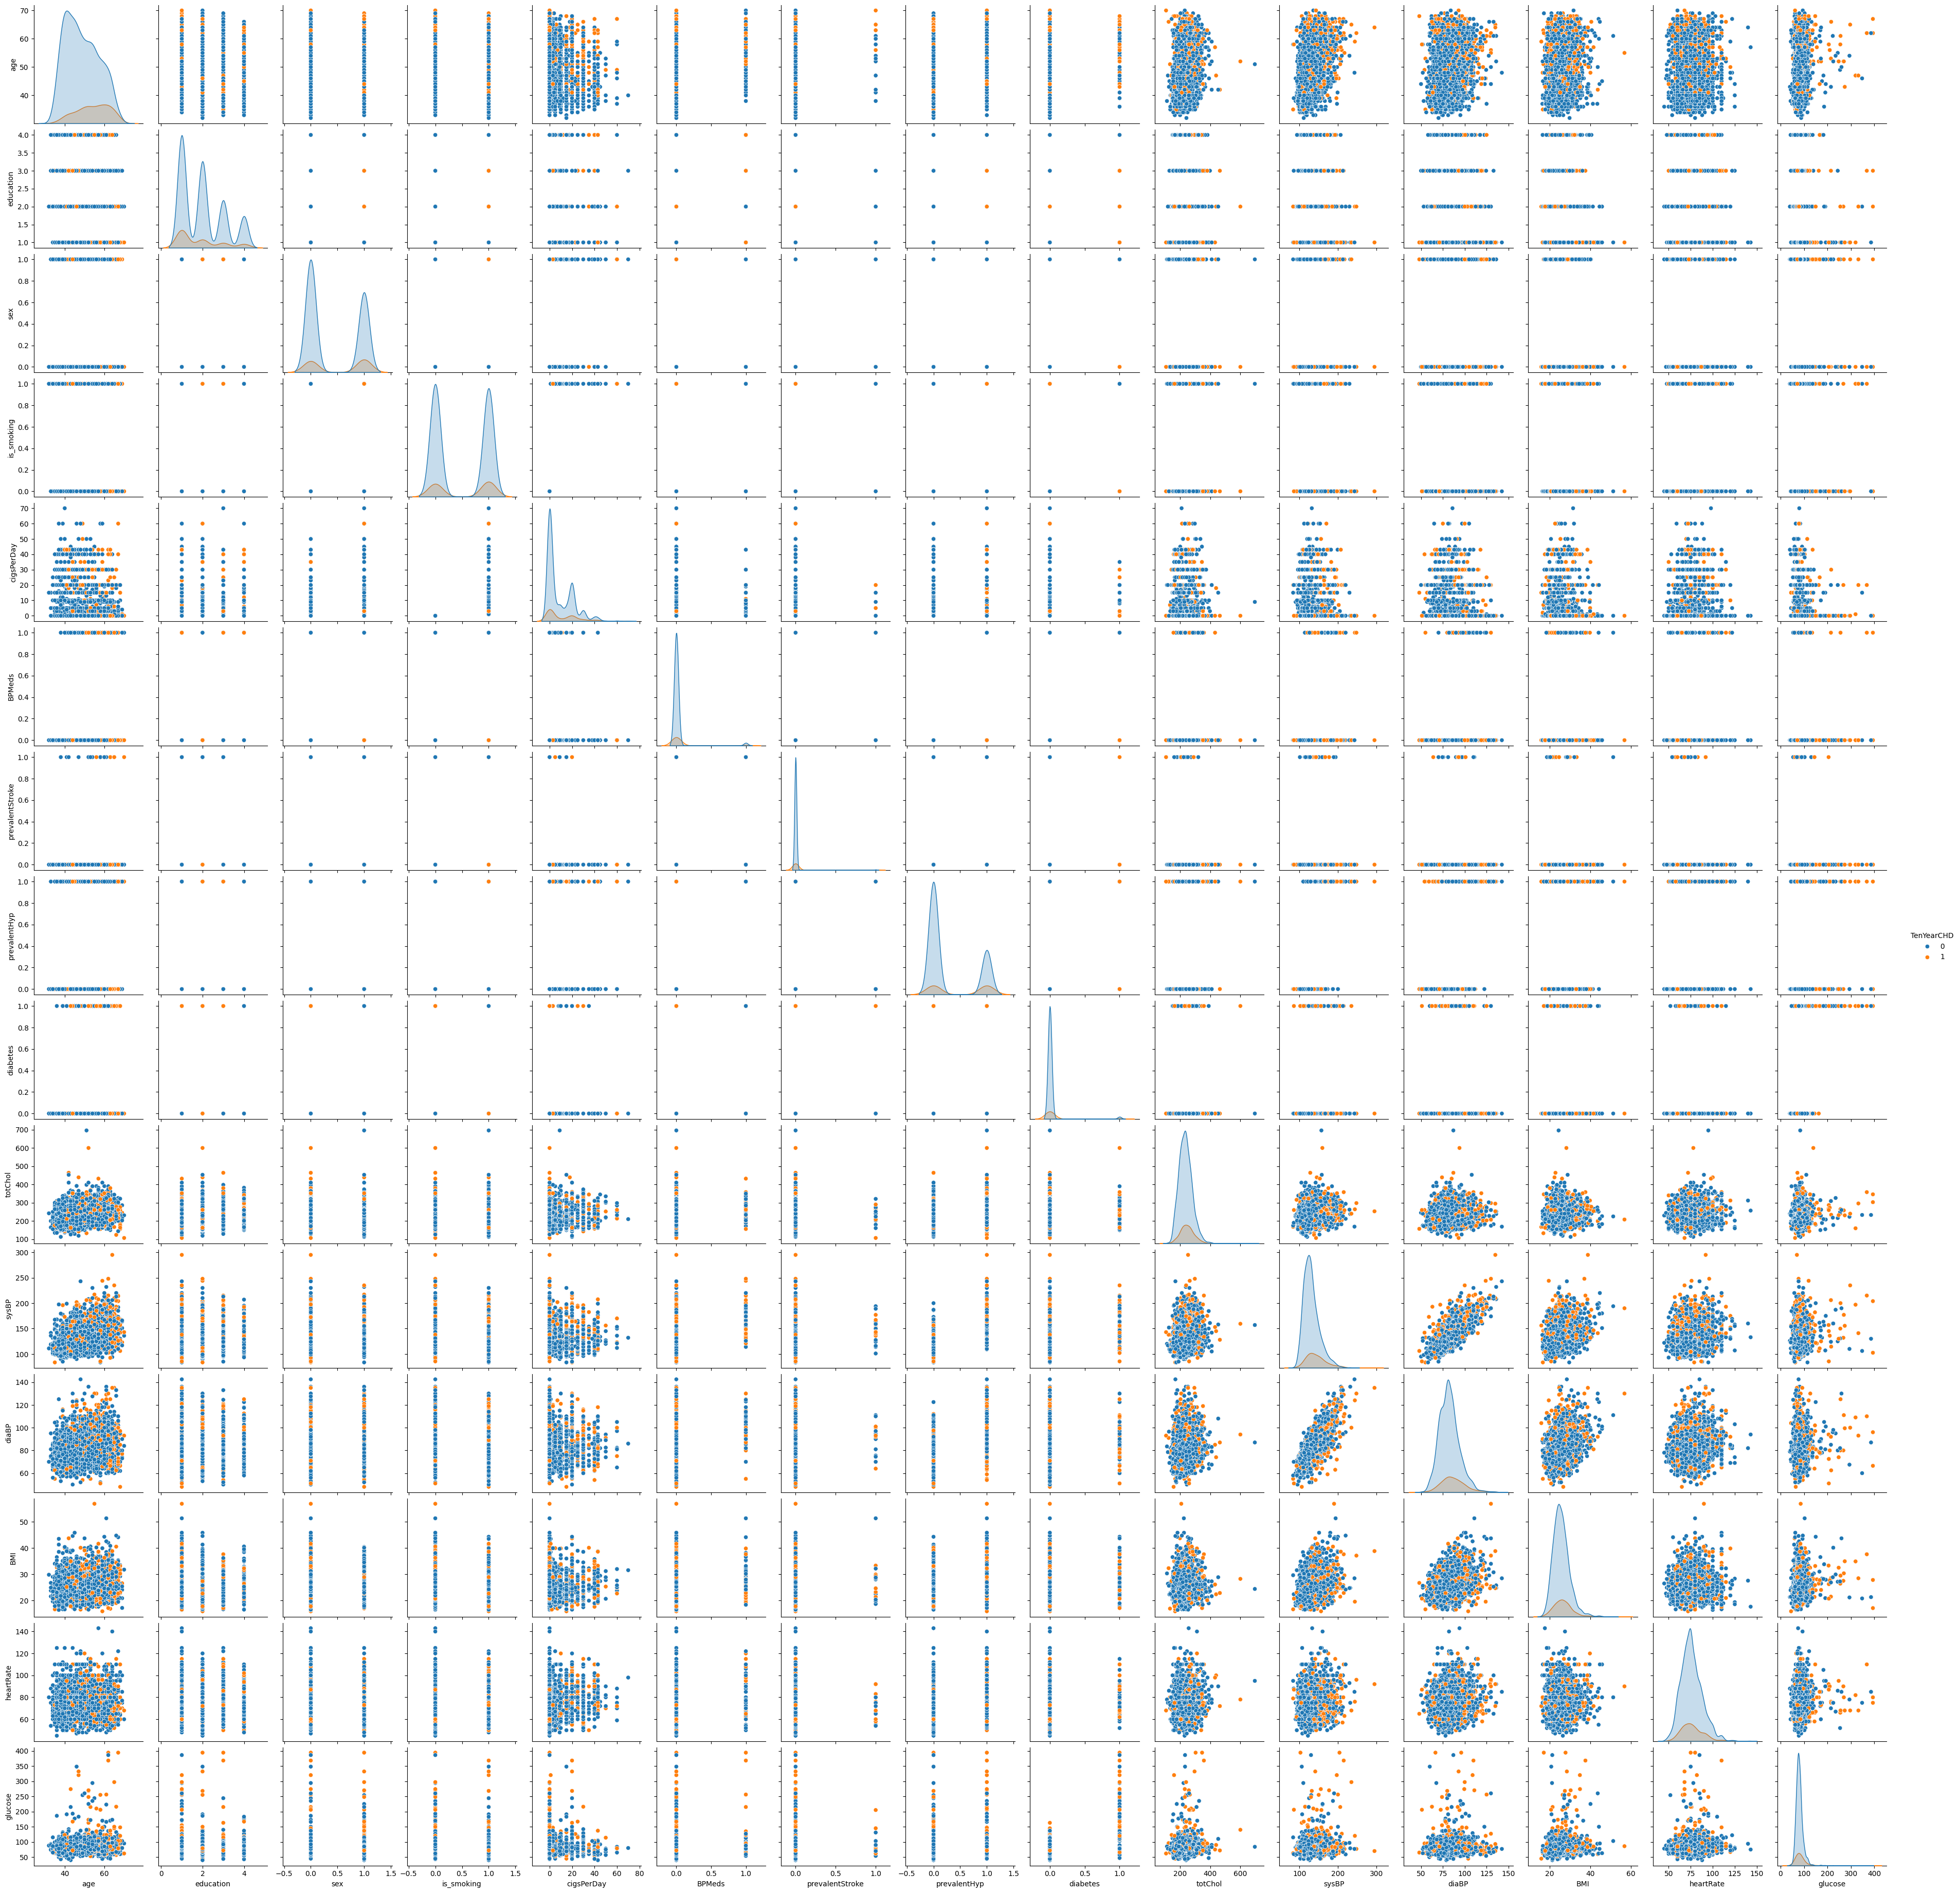

In [65]:
df.info()
sns.pairplot(df, hue = 'TenYearCHD')

Correlation

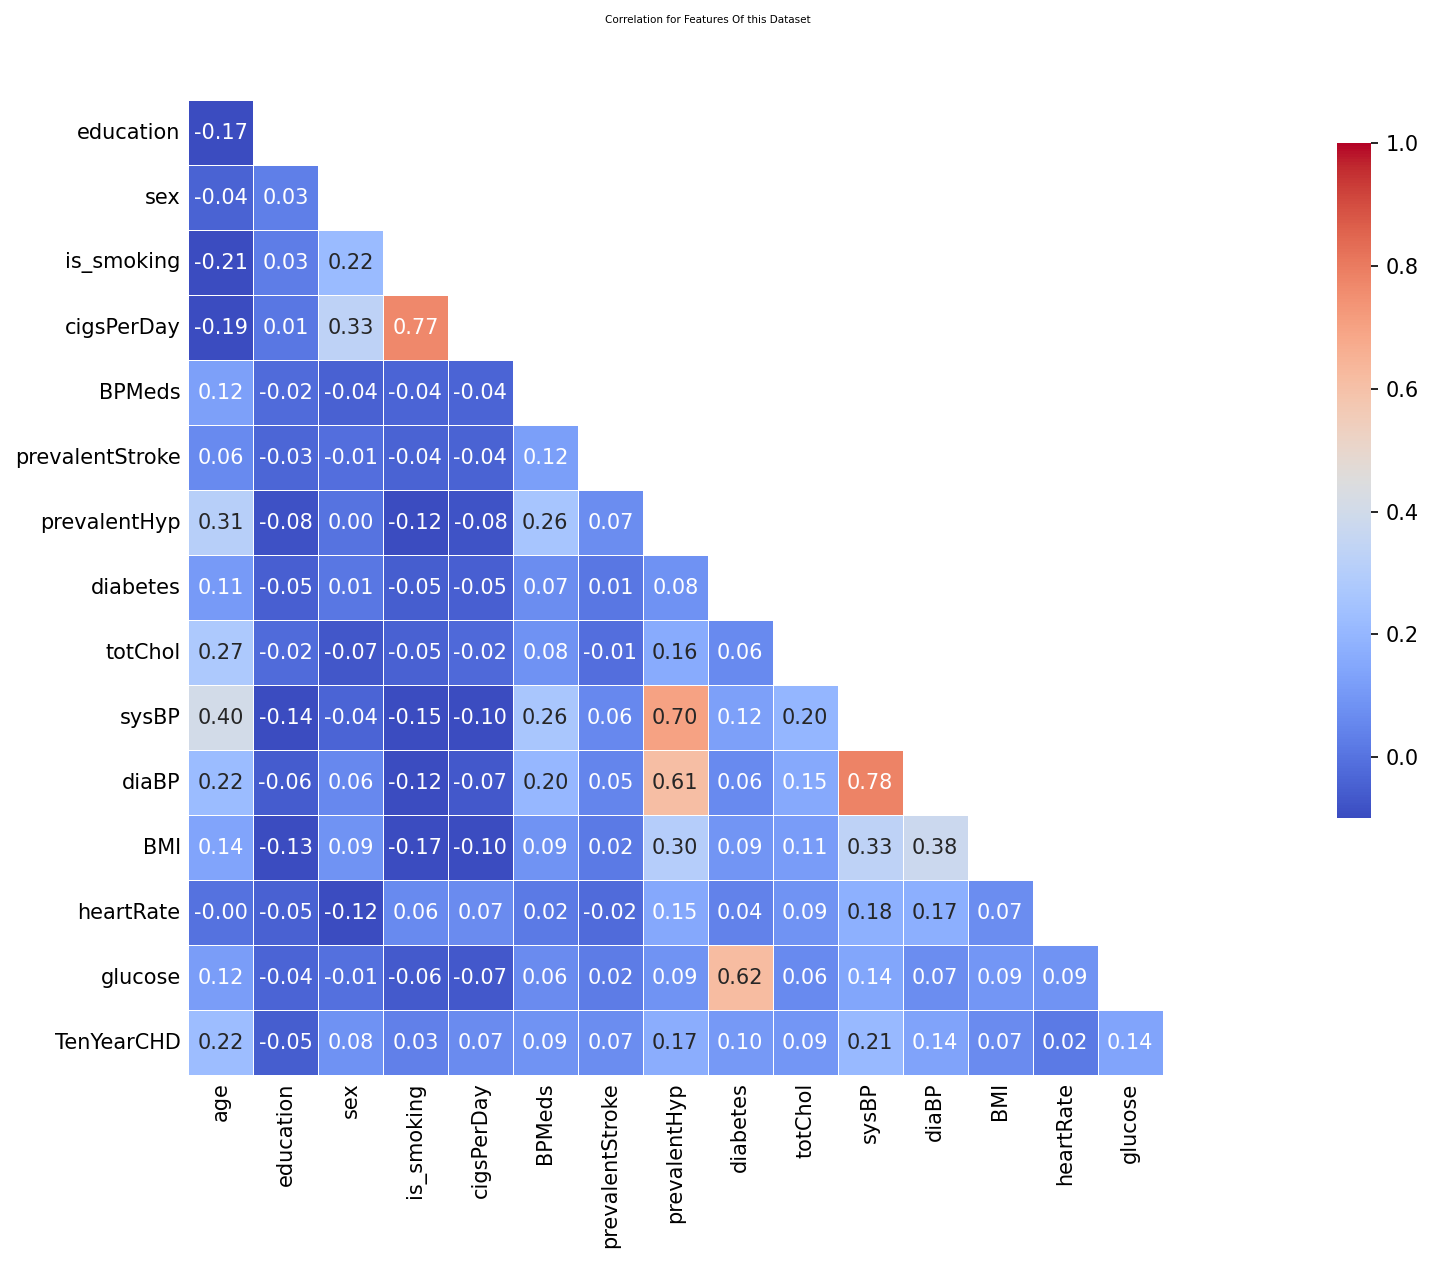

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr = df.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9), dpi=150)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.3,
                  cbar_kws={"shrink":0.5,  "pad":0.000001})

# Get the colorbar from the axes
cbar = fig.collections[0].colorbar

cbar.ax.set_position([0.85, 0.3, 0.04, 0.5])
cust_labels = df.columns.tolist()
cust_labels[0] = ''
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0)
cust_labels = df.columns.tolist()
cust_labels[len(cust_labels)-1]= ''
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of this Dataset", fontsize=5)
plt.savefig("Correlation for Features of this Dataset .pdf", bbox_inches='tight') # save figure
plt.show()


Gain Ratio

In [67]:
X_res = df.drop(columns=['TenYearCHD'])
y_res = df['TenYearCHD']

In [68]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

            Feature  Gain Ratio
5            BPMeds    0.065146
6   prevalentStroke    0.043513
8          diabetes    0.034595
12              BMI    0.028284
7      prevalentHyp    0.020970
14          glucose    0.016146
10            sysBP    0.013084
1         education    0.011091
9           totChol    0.010154
11            diaBP    0.008651
0               age    0.008641
2               sex    0.005190
4        cigsPerDay    0.004175
13        heartRate    0.003181
3        is_smoking    0.000842


 Plotting the gain ratios

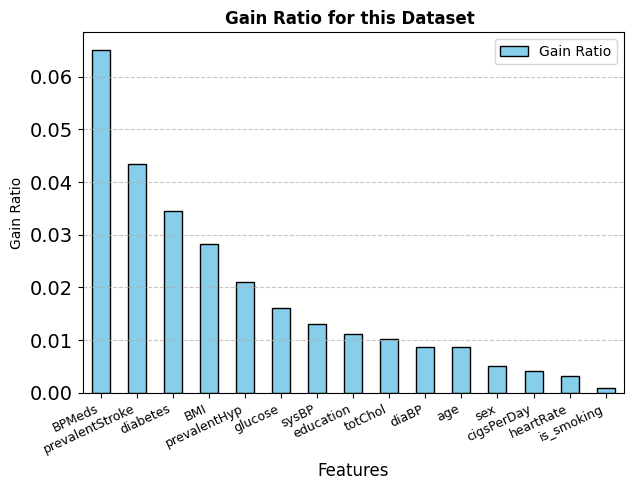

In [69]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for this Dataset ', fontsize=12, fontweight='bold')
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('Gain Ratio', fontsize=10)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=25, ha='right', fontsize=9)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for this Dataset.pdf") # save figure
plt.show()

Information Gain

In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)

            Feature  Information Gain
12              BMI          0.280605
14          glucose          0.091964
10            sysBP          0.090819
9           totChol          0.074391
11            diaBP          0.052819
0               age          0.043356
1         education          0.020320
7      prevalentHyp          0.018857
13        heartRate          0.015713
5            BPMeds          0.012627
4        cigsPerDay          0.011054
8          diabetes          0.005956
2               sex          0.005122
6   prevalentStroke          0.002458
3        is_smoking          0.000842


Plot the Information Gain

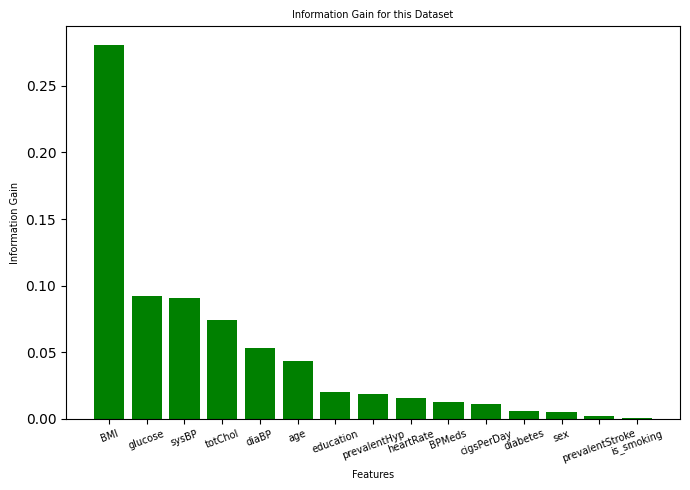

In [71]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(7, 5))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=7)
plt.xticks(fontsize=7, rotation=20)
plt.ylabel('Information Gain', fontsize=7)
plt.title('Information Gain for this Dataset', fontsize=7)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for this Dataset.pdf", bbox_inches='tight')

# Display the plot
plt.show()

Pearson Correlation Coefficient

In [72]:
corr_matrix = df.corr(method="pearson")

print("Pearson Correlation Matrix:\n", corr_matrix)

Pearson Correlation Matrix:
                       age  education       sex  is_smoking  cigsPerDay  \
age              1.000000  -0.172559 -0.041882   -0.210997   -0.192335   
education       -0.172559   1.000000  0.030202    0.027887    0.011126   
sex             -0.041882   0.030202  1.000000    0.215485    0.332208   
is_smoking      -0.210997   0.027887  0.215485    1.000000    0.772261   
cigsPerDay      -0.192335   0.011126  0.332208    0.772261    1.000000   
BPMeds           0.124376  -0.019920 -0.044306   -0.037985   -0.037080   
prevalentStroke  0.059038  -0.034194 -0.011273   -0.043703   -0.042057   
prevalentHyp     0.308826  -0.084817  0.003072   -0.119325   -0.079312   
diabetes         0.107875  -0.052013  0.008853   -0.053333   -0.049016   
totChol          0.274028  -0.020781 -0.070914   -0.047065   -0.024703   
sysBP            0.404845  -0.137195 -0.037369   -0.145721   -0.100834   
diaBP            0.221896  -0.060801  0.058840   -0.124318   -0.068785   
BMI      

Gain Ratio = IG / H(X)

In [73]:

# Step 0: Strip any extra spaces from column names
X_res.columns = X_res.columns.str.strip()

# Example for a single feature
feature = 'BPMeds'  # no extra space

# Calculate Information Gain (IG) and Split Information
IG = information_gain(X_res, y_res, feature)
feature_entropy = split_information(X_res, feature)

# Calculate Gain Ratio (GR) safely
GR = IG / feature_entropy if feature_entropy > 0 else 0

print(f"Information Gain for {feature}: {IG}")
print(f"Split Information for {feature}: {feature_entropy}")
print(f"Gain Ratio for {feature}: {GR}")

# -------------------------------
# Optional: Loop through all features to calculate IG and GR
info_gain = []
gain_ratio = []

for feature in X_res.columns:
    IG = information_gain(X_res, y_res, feature)
    feature_entropy = split_information(X_res, feature)
    GR = IG / feature_entropy if feature_entropy > 0 else 0

    info_gain.append(IG)
    gain_ratio.append(GR)

# Create a DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X_res.columns,
    'Information_Gain': info_gain,
    'Gain_Ratio': gain_ratio
})

print("\nFeature Scores:")
print(feature_scores)


Information Gain for BPMeds: 0.012626728737018533
Split Information for BPMeds: 0.19382199475003747
Gain Ratio for BPMeds: 0.06514600550521933

Feature Scores:
            Feature  Information_Gain  Gain_Ratio
0               age          0.043356    0.008641
1         education          0.020320    0.011091
2               sex          0.005122    0.005190
3        is_smoking          0.000842    0.000842
4        cigsPerDay          0.011054    0.004175
5            BPMeds          0.012627    0.065146
6   prevalentStroke          0.002458    0.043513
7      prevalentHyp          0.018857    0.020970
8          diabetes          0.005956    0.034595
9           totChol          0.074391    0.010154
10            sysBP          0.090819    0.013084
11            diaBP          0.052819    0.008651
12              BMI          0.280605    0.028284
13        heartRate          0.015713    0.003181
14          glucose          0.091964    0.016146


Information Gain

In [74]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

Encode categorical

In [75]:

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Initialize lists to store results
info_gain = []
gain_ratio = []

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Calculate Information Gain
    IG = information_gain(X, y, col)
    info_gain.append(IG)

    # Calculate Split Information
    feature_entropy = split_information(X, col)

    # Calculate Gain Ratio
    GR = IG / feature_entropy if feature_entropy > 0 else 0
    gain_ratio.append(GR)

Feature selection / feature importance analysis

            Feature  Pearson_r  Mutual_Info  Info_Gain  Gain_Ratio  \
12              BMI        0.0     0.227189   1.000000    0.633512   
7      prevalentHyp        0.0     0.978836   0.065360    0.471700   
8          diabetes        0.0     0.580773   0.018555    0.791009   
10            sysBP        0.0     0.750469   0.326440    0.286900   
6   prevalentStroke        0.0     0.352155   0.005866    1.000000   
0               age        0.0     1.000000   0.154243    0.182767   
11            diaBP        0.0     0.659475   0.188575    0.183015   
14          glucose        0.0     0.273925   0.150765    0.157061   
9           totChol        0.0     0.073832   0.238807    0.193333   
5            BPMeds        0.0     0.000000   0.012990    0.336079   

    Combined_Score  
12        0.465175  
7         0.378974  
8         0.347584  
10        0.340952  
6         0.339505  
0         0.334253  
11        0.257766  
14        0.145438  
9         0.126493  
5         0.087267 

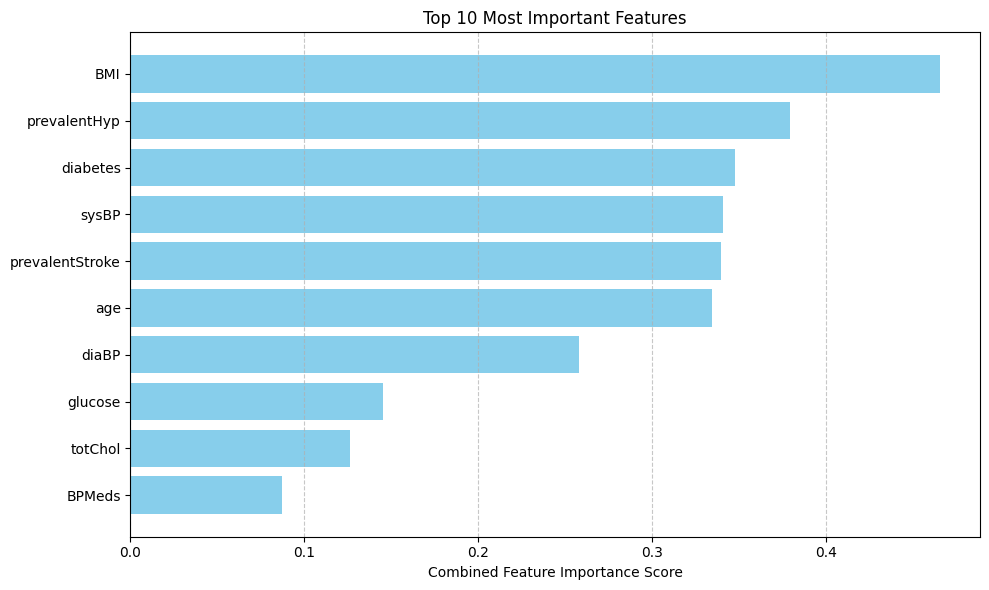

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# Step 0: Clean column names and handle missing values
X.columns = X.columns.str.strip()      # remove extra spaces
X = X.fillna(X.mean())                 # fill NaN with mean

# -------------------------------
# Step 1: Calculate Information Gain & Gain Ratio
info_gain = []
gain_ratio = []

for feature in X.columns:
    IG = information_gain(X, y, feature)            # your function
    feature_entropy = split_information(X, feature) # your function
    GR = IG / feature_entropy if feature_entropy > 0 else 0
    info_gain.append(IG)
    gain_ratio.append(GR)

# -------------------------------
# Step 2: Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# -------------------------------
# Step 3: Calculate Pearson correlation with target
if 'TenYearCHD' in X.columns:
    pearson_corr = X.corr(numeric_only=True)['TenYearCHD'].drop('TenYearCHD')
else:
    pearson_corr = pd.Series([0]*X.shape[1], index=X.columns)

pearson_df = pd.DataFrame({'Feature': pearson_corr.index, 'Pearson_r': pearson_corr.values})
pearson_df.set_index('Feature', inplace=True)

# -------------------------------
# Step 4: Combine all feature scores
score_df = pd.DataFrame({
    'Feature': X.columns,
    'Pearson_r': [pearson_df.loc[f, 'Pearson_r'] if f in pearson_df.index else 0 for f in X.columns],
    'Mutual_Info': mi_scores,
    'Info_Gain': info_gain,
    'Gain_Ratio': gain_ratio
})

# -------------------------------
# Step 5: Normalize scores (0-1 scale)
scaler = MinMaxScaler()
score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']] = scaler.fit_transform(
    score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']]
)

# -------------------------------
# Step 6: Compute combined score and sort
score_df['Combined_Score'] = score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']].mean(axis=1)
score_df.sort_values('Combined_Score', ascending=False, inplace=True)

# -------------------------------
# Step 7: Display top 10 features
print(score_df.head(10))

# -------------------------------
# Step 8: Plot top 10 features
top_features = score_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Combined_Score'][::-1], color='skyblue')
plt.xlabel('Combined Feature Importance Score')
plt.title('Top 10 Most Important Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Feature Selection

In [77]:
# Top features based on Info Gain
selected_features = score_df.head(6)["Feature"].tolist()
print("Selected Features:", selected_features)

Selected Features: ['BMI', 'prevalentHyp', 'diabetes', 'sysBP', 'prevalentStroke', 'age']


Pearson correlation matrix visually

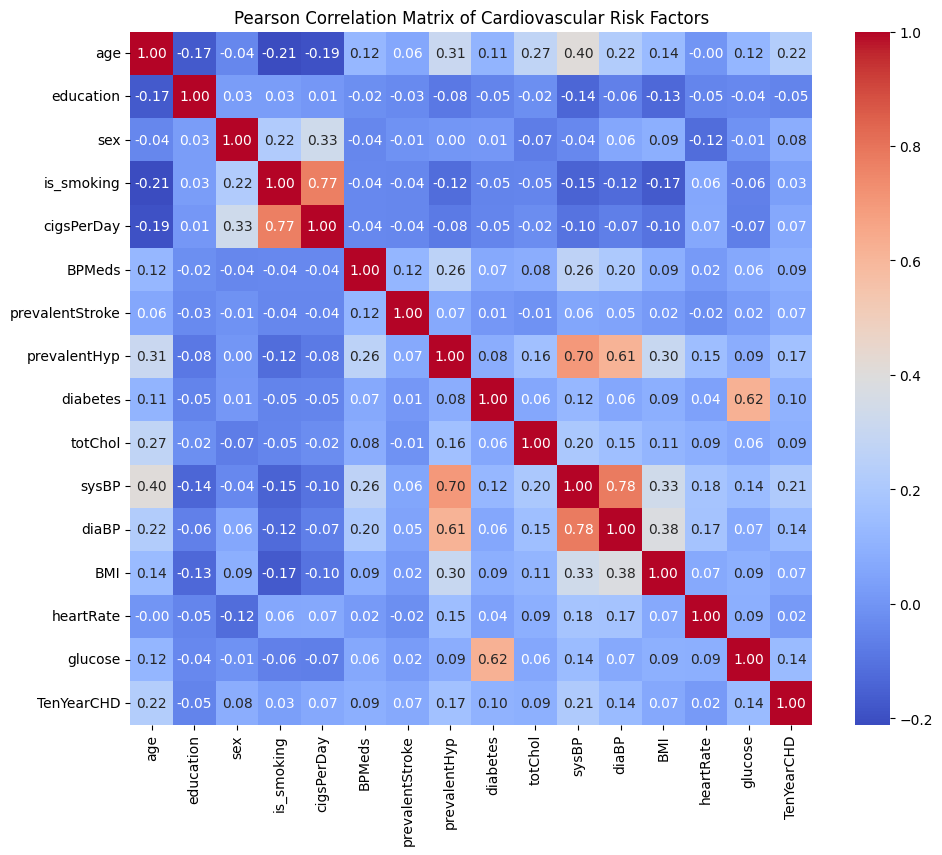

In [78]:
# Heatmap for visualization
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix of Cardiovascular Risk Factors")
plt.show()

Feature importance visually compare

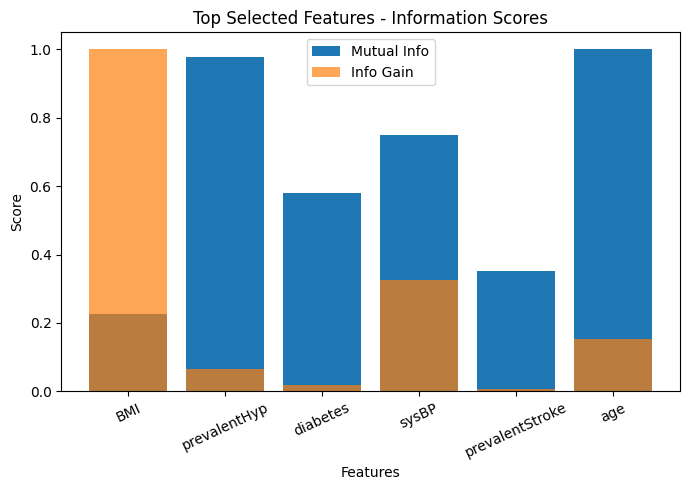

In [79]:
# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(score_df["Feature"][:6], score_df["Mutual_Info"][:6], label="Mutual Info")
plt.bar(score_df["Feature"][:6], score_df["Info_Gain"][:6], alpha=0.7, label="Info Gain")
plt.title("Top Selected Features - Information Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.legend()
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig("cardio_feature_importance_bar.png")
plt.show()

Top selected Feature & Cardio relation visualition

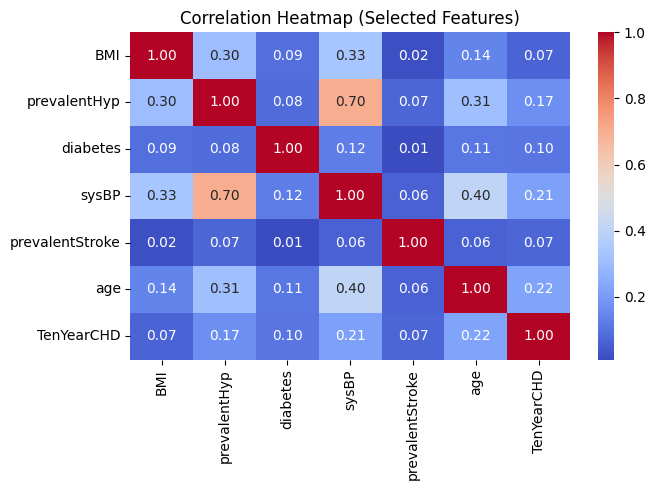

In [80]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[selected_features + ['TenYearCHD']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.tight_layout()
plt.savefig("TenYearCHD_feature_correlation_heatmap.png")
plt.show()

Hybrid feature selection


✅ Hybrid Feature Importance Ranking (Top Features):

            Feature  Correlation  Information Gain  Gain Ratio  Hybrid Score
10            sysBP     0.940279          0.321621    0.190384      0.529713
12              BMI     0.228182          1.000000    0.426765      0.519302
0               age     1.000000          0.151966    0.121283      0.481975
5            BPMeds     0.331135          0.042126    1.000000      0.445092
14          glucose     0.576292          0.325711    0.238004      0.399631
7      prevalentHyp     0.714770          0.064395    0.313016      0.399131
8          diabetes     0.407648          0.018281    0.524906      0.326015
11            diaBP     0.565440          0.185791    0.121447      0.318348
6   prevalentStroke     0.236389          0.005779    0.663590      0.295367
9           totChol     0.361847          0.262897    0.144820      0.267054

🎯 Top Selected Features: ['sysBP', 'BMI', 'age', 'BPMeds', 'glucose', 'prevalentHyp', 'diabetes', 

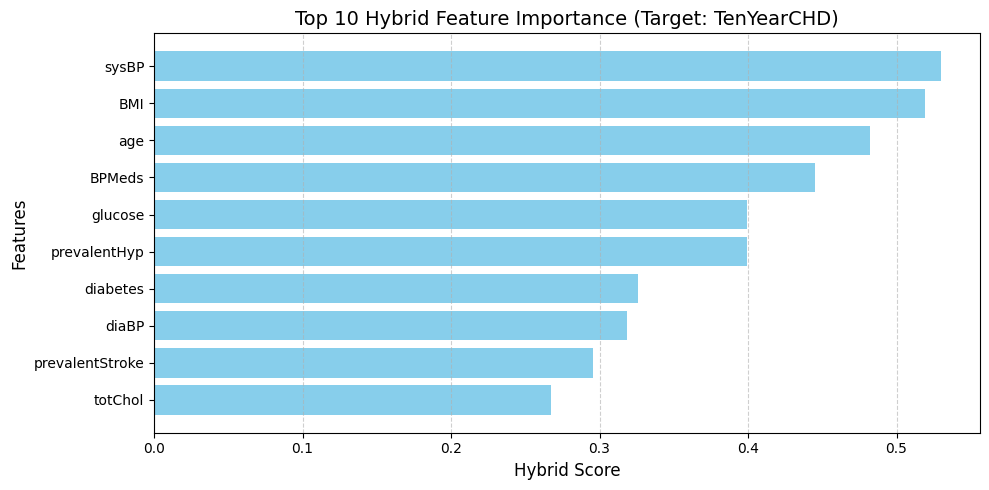

In [89]:
# ✅ Hybrid Feature Selection for Target: TenYearCHD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# Step 1: Prepare Data
# ======================================
target_column = 'TenYearCHD'  # Target variable
X_res = df.drop(columns=[target_column])
y_res = df[target_column]

# ======================================
# Step 2: Compute Correlation
# ======================================
corr = df.corr(numeric_only=True)
target_corr = corr[target_column].abs().sort_values(ascending=False)
target_corr = target_corr.drop(target_column, errors='ignore')

# ======================================
# Step 3: Define Functions (Entropy, IG, GR)
# ======================================
def entropy(y_res):
    """Compute entropy of the target variable"""
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def information_gain(X_res, y_res, feature):
    """Compute Information Gain for one feature"""
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += (len(subset) / len(X_res)) * entropy(subset)
    return base_entropy - feature_entropy

def split_information(X_res, feature):
    """Compute Split Information"""
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def gain_ratio(X_res, y_res, feature):
    """Compute Gain Ratio"""
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# ======================================
# Step 4: Compute IG & GR for all features
# ======================================
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# ======================================
# Step 5: Combine Scores into a Hybrid Metric
# ======================================
hybrid_df = pd.DataFrame({
    'Feature': X_res.columns,
    'Correlation': [target_corr.get(f, 0) for f in X_res.columns],
    'Information Gain': [information_gains[f] for f in X_res.columns],
    'Gain Ratio': [gain_ratios[f] for f in X_res.columns]
})

# Normalize all scores (0–1)
for col in ['Correlation', 'Information Gain', 'Gain Ratio']:
    min_val = hybrid_df[col].min()
    max_val = hybrid_df[col].max()
    hybrid_df[col] = (hybrid_df[col] - min_val) / (max_val - min_val + 1e-9)

# Weighted Hybrid Score (you can adjust weights)
hybrid_df['Hybrid Score'] = (
    0.4 * hybrid_df['Correlation'] +
    0.3 * hybrid_df['Information Gain'] +
    0.3 * hybrid_df['Gain Ratio']
)

# ======================================
# Step 6: Sort and Select Top Features
# ======================================
hybrid_df = hybrid_df.sort_values(by='Hybrid Score', ascending=False)
top_n = 10  # Change this number to select more/less top features
top_features = hybrid_df.head(top_n)['Feature'].tolist()

print("\n✅ Hybrid Feature Importance Ranking (Top Features):\n")
print(hybrid_df.head(top_n))

print("\n🎯 Top Selected Features:", top_features)

# ======================================
# Step 7: Visualize Hybrid Scores
# ======================================
plt.figure(figsize=(10, 5))
plt.barh(hybrid_df.head(top_n)['Feature'], hybrid_df.head(top_n)['Hybrid Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Hybrid Feature Importance (Target: TenYearCHD)", fontsize=14)
plt.xlabel("Hybrid Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Train ML/DL Models



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



🎯 ML Model Performance (Top Features):

                    Accuracy        F1
LogisticRegression  0.848823  0.080229
RandomForest        0.848083  0.122000
SVM                 0.849189  0.046309
KNN                 0.838130  0.175645
MLP                 0.835924  0.176598


/tmp/ipython-input-899475914.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, performance_df['Accuracy'][i]+0.02, 'Best', ha='center', fontweight='bold', color='red')


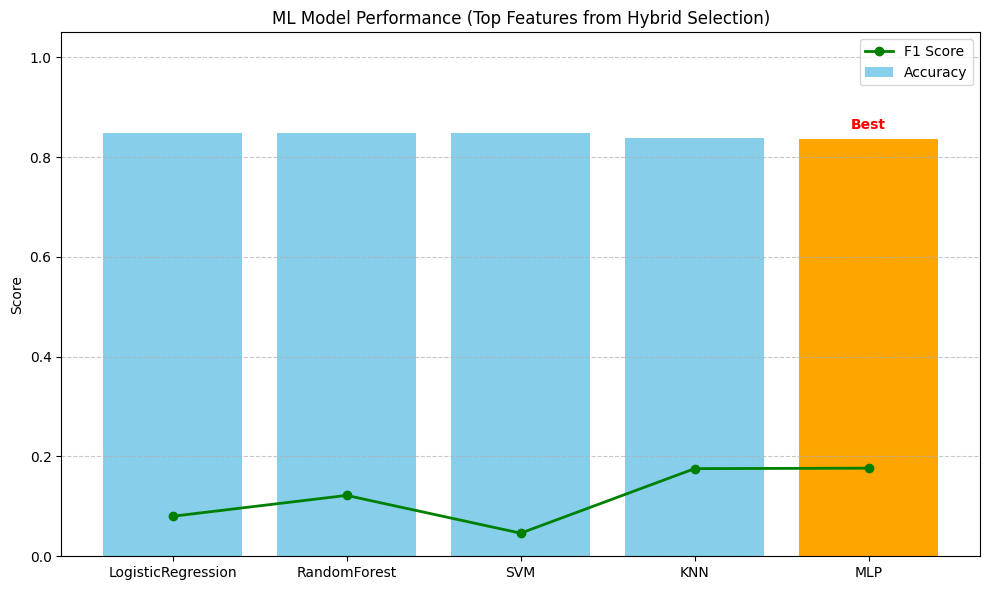

In [98]:
# ======================================
# ✅ ML Model Training & Evaluation (Top Features) + Highlight Best Model
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# ======================================
# 1. Prepare Data
# ======================================
target_column = 'TenYearCHD'
top_n = 10
top_features = hybrid_df.head(top_n)['Feature'].tolist()

# Redefine X using only the top features
X = df[top_features]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Added stratify
)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling - fit only on training data (after imputation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Update imputed variables to hold scaled data
X_train_imputed = X_train_scaled
X_test_imputed = X_test_scaled


# ======================================
# 2. Define ML Models
# ======================================
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

performance = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ======================================
# 3. Cross-Validation & Training
# ======================================
for name, model in models.items():
    # Use imputed and scaled data for cross-validation and training
    acc = cross_val_score(model, X_train_imputed, y_train, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_train_imputed, y_train, cv=cv, scoring='f1').mean()
    model.fit(X_train_imputed, y_train)  # Fit final model on imputed and scaled data
    performance[name] = [acc, f1]

# ======================================
# 4. Create Performance DataFrame
# ======================================
performance_df = pd.DataFrame(performance, index=["Accuracy", "F1"]).T
print("\n🎯 ML Model Performance (Top Features):\n")
print(performance_df)

# ======================================
# 5. Highlight Best Model (Highest F1)
# ======================================
best_model_name = performance_df['F1'].idxmax()
colors = ['skyblue' if model != best_model_name else 'orange' for model in performance_df.index]

# ======================================
# 6. Visualization
# ======================================
plt.figure(figsize=(10,6))
bars = plt.bar(performance_df.index, performance_df['Accuracy'], color=colors, label='Accuracy')
plt.plot(performance_df.index, performance_df['F1'], color='green', marker='o', linewidth=2, label='F1 Score')

# Annotate Best Model
for i, model in enumerate(performance_df.index):
    if model == best_model_name:
        plt.text(i, performance_df['Accuracy'][i]+0.02, 'Best', ha='center', fontweight='bold', color='red')

plt.title("ML Model Performance (Top Features from Hybrid Selection)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Hyperparameter tuning for top models (RandomizedSearchCV)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

RandomForest Best Params: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__bootstrap': False}
Fitting 5 folds for each of 20 candidates, totalling 100 fits

MLP Best Params: {'mlpclassifier__solver': 'adam', 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__hidden_layer_sizes': (50, 50), 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__activation': 'relu'}

🎯 Performance Before Tuning:
               Accuracy        F1
RandomForest  0.852507  0.122807
MLP           0.846608  0.133333

🎯 Performance After Tuning:
               Accuracy        F1
RandomForest  0.837758  0.098361
MLP           0.802360  0.151899

🏆 Best Tuned Model: MLP


/tmp/ipython-input-890670454.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, after_df['Accuracy'][i]+0.02, 'Best', ha='center', fontweight='bold', color='red')


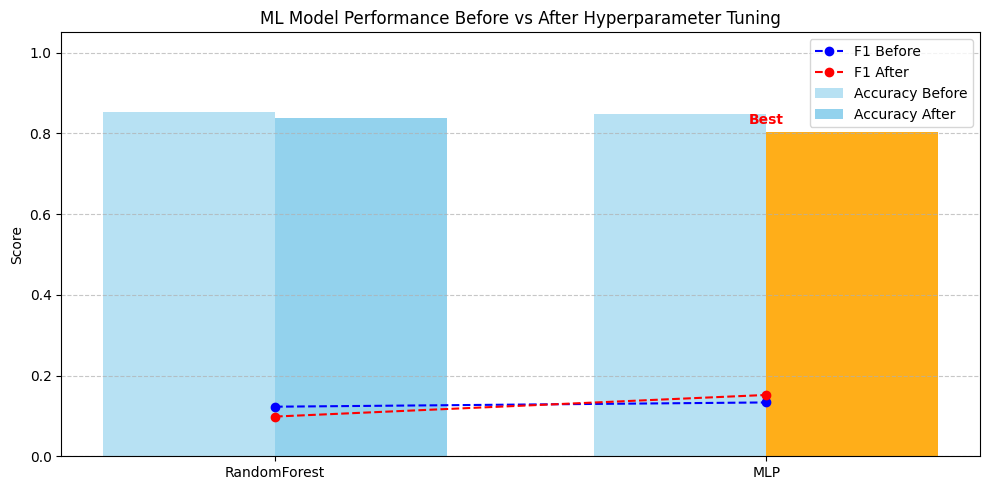

In [101]:
# ======================================
# ✅ Hyperparameter Tuning + Highlight Best Model
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline # Import make_pipeline

# ======================================
# 1. Prepare Data (using top_features)
# ======================================
target_column = 'TenYearCHD'
top_n = 10
top_features = hybrid_df.head(top_n)['Feature'].tolist()

X = df[top_features] # Use top features
y = df[target_column]

# Train-test split (using X with top features)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Added stratify
)

# Imputation and Scaling will be done within the pipeline for tuning
# Keep separate imputed/scaled data for final evaluation if needed later, but tuning uses pipeline

# ======================================
# 2. Define Top Models & Hyperparameter Grids within Pipelines
# ======================================
# Define pipelines for each model
pipeline_rf = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), RandomForestClassifier(random_state=42))
pipeline_mlp = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), MLPClassifier(max_iter=2000, random_state=42)) # Increased max_iter

top_models_pipelines = {
    "RandomForest": pipeline_rf,
    "MLP": pipeline_mlp
}

param_grids = {
    "RandomForest": {
        "randomforestclassifier__n_estimators": [50, 100, 200, 300],
        "randomforestclassifier__max_depth": [None, 5, 10, 20],
        "randomforestclassifier__min_samples_split": [2, 5, 10],
        "randomforestclassifier__min_samples_leaf": [1, 2, 4],
        "randomforestclassifier__bootstrap": [True, False]
    },
    "MLP": {
        "mlpclassifier__hidden_layer_sizes": [(50,), (100,), (50,50), (100,50)],
        "mlpclassifier__activation": ['relu', 'tanh'],
        "mlpclassifier__solver": ['adam', 'sgd'],
        "mlpclassifier__alpha": [0.0001, 0.001, 0.01],
        "mlpclassifier__learning_rate": ['constant', 'adaptive']
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

performance_before = {}
performance_after = {}
tuned_models = {} # Dictionary to store the best tuned estimators

# ======================================
# 3. Tune Models & Evaluate
# ======================================
for name, pipeline in top_models_pipelines.items():
    # Before tuning (evaluate the default pipeline)
    # Need to fit the default pipeline first
    pipeline.fit(X_train, y_train) # Fit on original X_train (pipeline handles imputation/scaling)
    y_pred = pipeline.predict(X_test) # Predict on original X_test
    performance_before[name] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)]


    # RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=pipeline, # Use the pipeline as the estimator
        param_distributions=param_grids[name],
        n_iter=20,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        verbose=1 # Increased verbosity to see progress
    )
    search.fit(X_train, y_train) # Fit search on original X_train (pipeline handles preprocessing)
    best_pipeline = search.best_estimator_
    tuned_models[name] = best_pipeline # Store the best pipeline


    # After tuning (evaluate the best pipeline)
    y_pred_tuned = best_pipeline.predict(X_test) # Predict on original X_test
    performance_after[name] = [accuracy_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned)]

    print(f"\n{name} Best Params:", search.best_params_)

# ======================================
# 4. Create Performance DataFrames
# ======================================
before_df = pd.DataFrame(performance_before, index=['Accuracy', 'F1']).T
after_df = pd.DataFrame(performance_after, index=['Accuracy', 'F1']).T

print("\n🎯 Performance Before Tuning:\n", before_df)
print("\n🎯 Performance After Tuning:\n", after_df)

# Create tuned_df for consistency with the next cell
tuned_df = after_df.reset_index().rename(columns={'index': 'model'})
tuned_df['roc_auc'] = np.nan # Add a placeholder for roc_auc if not calculated here (can add later)


# ======================================
# 5. Identify Best Model (Highest F1 After Tuning)
# ======================================
best_model_name = after_df['F1'].idxmax()
print(f"\n🏆 Best Tuned Model: {best_model_name}")

# ======================================
# 6. Visualization: Highlight Best Model
# ======================================
x = np.arange(len(top_models_pipelines)) # Use length of pipelines for x-axis
width = 0.35

plt.figure(figsize=(10,5))

colors = ['orange' if model == best_model_name else 'skyblue' for model in after_df.index]

# Accuracy Bars
plt.bar(x - width/2, before_df['Accuracy'], width, label='Accuracy Before', color='skyblue', alpha=0.6)
plt.bar(x + width/2, after_df['Accuracy'], width, label='Accuracy After', color=colors, alpha=0.9)

# F1 Lines
plt.plot(x, before_df['F1'], color='blue', marker='o', linestyle='--', label='F1 Before')
plt.plot(x, after_df['F1'], color='red', marker='o', linestyle='--', label='F1 After')

# Annotate Best Model
for i, model in enumerate(after_df.index):
    if model == best_model_name:
        plt.text(i, after_df['Accuracy'][i]+0.02, 'Best', ha='center', fontweight='bold', color='red')

plt.xticks(x, after_df.index)
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.title("ML Model Performance Before vs After Hyperparameter Tuning")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Choose best tuned model and show confusion/ROC



Best tuned model: RandomForest


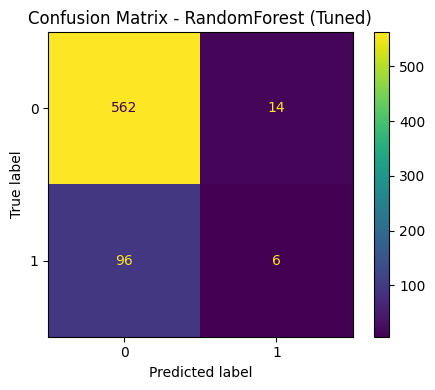

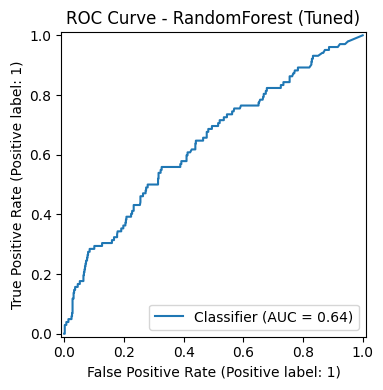

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc

# pick best tuned model by f1 (if any)
if not tuned_df.empty:
    best_name = tuned_df.iloc[0]["model"]
    best_model = tuned_models[best_name]
    print("Best tuned model:", best_name)
    y_pred_best = best_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,4))
    disp.plot(ax=ax, values_format='d')
    plt.title(f"Confusion Matrix - {best_name} (Tuned)")
    plt.tight_layout(); plt.savefig(f"/content/outputs/confusion_matrix_{best_name}.png", dpi=150)
    plt.show()

    # ROC if probas exist
    if hasattr(best_model, "predict_proba"):
        y_proba_best = best_model.predict_proba(X_test)[:,1]
        fig, ax = plt.subplots(figsize=(5,4))
        RocCurveDisplay.from_predictions(y_test, y_proba_best, ax=ax)
        plt.title(f"ROC Curve - {best_name} (Tuned)")
        plt.tight_layout(); plt.savefig(f"/content/outputs/roc_curve_{best_name}.png", dpi=150)
        plt.show()
else:
    print("No tuned models available (tuning may have been skipped).")

In [103]:
pip install lime


Explainable AI: SHAP (try) and LIME (try), fallback permutation importance



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.

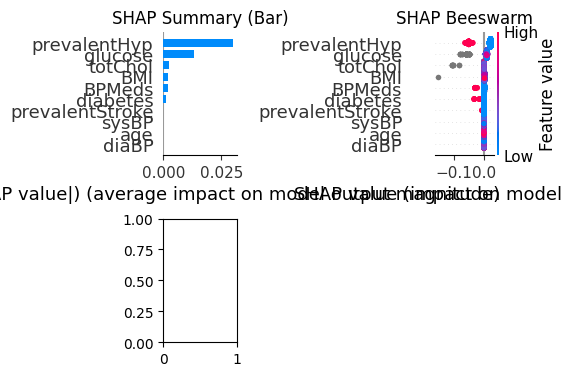

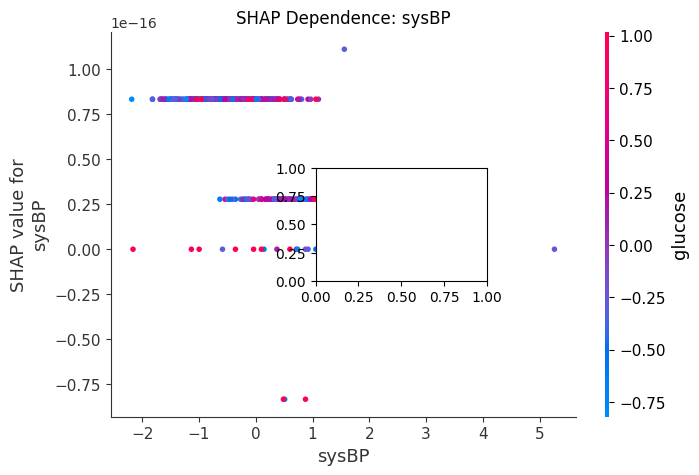

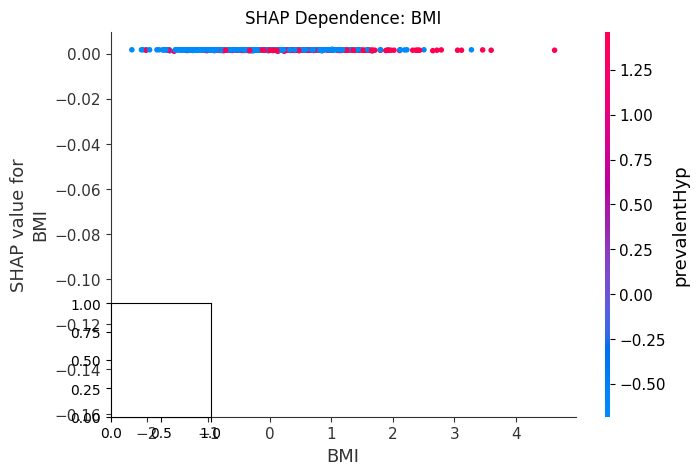

In [115]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

# ======================================
# 1. Scale for SHAP
# ======================================
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 2. SHAP Explainer
# ======================================
explainer = shap.Explainer(lambda x: best_model.predict_proba(x)[:,1], X_train_scaled)
shap_values = explainer(X_test_scaled)

# ======================================
# 3. LIME Setup
# ======================================
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=top_features,
    class_names=[str(c) for c in np.unique(y_train)],
    mode='classification'
)
predict_fn = lambda x: best_model.predict_proba(scaler.transform(x))
proba = best_model.predict_proba(X_test_scaled)[:,1]
top5_idx = np.argsort(proba)[-5:][::-1]

# ======================================
# 4. Create Single-Page Dashboard PDF
# ======================================
pdf_path = "XAI_Dashboard_SinglePage.pdf"

with PdfPages(pdf_path) as pdf:

    fig = plt.figure(figsize=(22, 20))

    # --- SHAP Summary Bar
    plt.subplot2grid((3,3), (0,0))
    shap.summary_plot(shap_values, X_test_scaled, feature_names=top_features,
                      plot_type="bar", show=False)
    plt.title("SHAP Summary (Bar)")

    # --- SHAP Beeswarm
    plt.subplot2grid((3,3), (0,1))
    shap.summary_plot(shap_values, X_test_scaled, feature_names=top_features, show=False)
    plt.title("SHAP Beeswarm")

    # --- SHAP Dependence Plots (Top 2 features)
    for j, feat in enumerate(top_features[:2]):
        plt.subplot2grid((3,3), (1,j))
        shap.dependence_plot(feat, shap_values.values, X_test_scaled,
                             feature_names=top_features, show=False)
        plt.title(f"SHAP Dependence: {feat}")

    # --- LIME Top 5 Instances in Bottom Row
    for idx, i in enumerate(top5_idx):
        ax = plt.subplot2grid((3,5), (2, idx))
        instance = X_test.iloc[i].values
        exp = lime_explainer.explain_instance(
            data_row=instance,
            predict_fn=predict_fn,
            num_features=len(top_features)
        )
        lime_fig = exp.as_pyplot_figure()
        # Copy LIME figure to this subplot
        for child in lime_fig.get_children():
            ax._add_text(child) if hasattr(ax, "_add_text") else None

        # Add probability bar
        bar_width = 0.6
        bar_height = 0.04
        x_pos = 0.2
        y_pos = -0.15
        ax.add_patch(
            mpatches.Rectangle(
                (x_pos, y_pos),
                width=proba[i]*bar_width,
                height=bar_height,
                color='red' if proba[i]>0.5 else 'green',
                alpha=0.6
            )
        )
        ax.text(x_pos + 0.3*bar_width, y_pos + 0.02,
                f'Pred Prob: {proba[i]:.2f}',
                color='black', weight='bold', fontsize=10, ha='center')

    plt.suptitle("Explainable AI Dashboard (SHAP + LIME) - Single Page", fontsize=22)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    pdf.savefig(fig)
    plt.close()

print(f"✅ Dashboard saved as PDF: {pdf_path}")
